In [1]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes



# Data Structure

The data available on the [National Data Buoy Center](https://www.ndbc.noaa.gov/) record the data of different stations on the water or on the coast all around the world.
The data is saved in different ways. First of all, we have the real-time data which contains the data recorded from the last 45 days. It undergoes only through gross automatic quality check. 
Then, we have the quality controlled data which is divided in two categories the data from the previous month and the data from the prior months of the current year. Finally, we have the historical data which contains the values of the previous years. it can go back up to 1970.

The quality controlled data contains several categories:
- Standard meteorological data
- Continuous winds data
- Spectral wave density data
- Spectral mean wave direction data
- Spectral principal wave direction data
- Spectral wave directional constant R1 data
- Spectral wave directional constant R2 data
- Water level data
- Tsunameter (DART) water level data
- Acoustic Doppler Current Profiler (ADCP) data
- Revised format Acoustic Doppler Current Profiler (ADCP) data
- Oceanographic data
- Solar Radiation data

Note that not all the stations records the previous categories. To know which data is recorded in those categories please consult the [following link](https://www.ndbc.noaa.gov/faq/measdes.shtml).

The tricky part of dowloading and analyzing the data is that even if a station saves a specific category (eg. Standard meteorological data), it is not guaranted that the station recorded every variable of the corresponding category. In addition, during the years, the stations were upgraded and modified which means that some variables are saved in recent years but originally not.
If a station does not record a specific variable (or if there was an error in the sensing), the value will be filled with 9's (respectively with MM in real-time data).

Another problem is that some stations like [the 44029](https://www.ndbc.noaa.gov/station_history.php?station=44029) have the data hosted on [the Neracoos website](https://www.neracoos.org/erddap/index.html). This website regroups several database and offers a pretty flexibility in the research of the stations. However, it does not contain all the station of the National Data Buoy Center and can only be used as a complement.

# Stations explanation
The stations are owned different organizations and are part of different programs which results in some differences in the data loaded. However, the names, since 1977, the World Meteorological Organization (WMO) assigns a 5-character alpha-numeric station identifier to all weather observation stations. The rules can be found at this [link](https://www.ndbc.noaa.gov/faq/staid.shtml).
Another problem with the stations is to sort them according to their position. In fact, the National Data Buoy Center offers a radial search available but only for the real-time data. The tool could be used to create a list and then retrieve the different numbers and look for the historical data. 



In [2]:

def load_data_real_time(station_number: int):
    url = f'https://www.ndbc.noaa.gov/data/realtime2/{station_number}.txt'
    response = requests.get(url)
    if response.status_code == 200:
        with open(f'data/downloaded_file_{station_number}.txt', 'wb') as file:
            file.write(response.content)
        print("File downloaded successfully!")
    else:
        raise Exception(f"Failed to download file. Status code: {response.status_code}")

def load_history_data(station_number: int, year: int):
    url = f'https://www.ndbc.noaa.gov/view_text_file.php?filename={station_number}h{year}.txt.gz&dir=data/historical/stdmet/'
    response = requests.get(url)
    if response.status_code == 200:
        with open(f'data/downloaded_historical_file_{station_number}_{year}.txt', 'wb') as file:
            file.write(response.content)
        print("File downloaded successfully!")
    else:
        raise Exception(f"Failed to download file. Status code: {response.status_code}")


In [3]:

def create_dataframe(station_number: int, station_dataframe: pd.DataFrame):
    df = pd.read_csv(f'data/downloaded_file_{station_number}.txt', delim_whitespace=True, skiprows=2)
    df.columns = ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD',
                  'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'PTDY', 'TIDE']
    station_dataframe = pd.concat([station_dataframe, df])
    return station_dataframe

def create_historical_dataframe(station_number: int, year: int, station_dataframe: pd.DataFrame):
    df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)
    df.columns = ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD',
                  'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']
    station_dataframe = pd.concat([station_dataframe, df])
    return station_dataframe


In [4]:
station_numbers = [44013, 'iosn3']
years = range(2008, 2024)

# create array of empty dataframes
station_dataframes = []
for station_number in station_numbers:
    station_dataframes.append(pd.DataFrame())

In [5]:
for ind,station_number in enumerate(station_numbers):
    for year in years: 
        print(f"Downloading data for station {station_number} for year {year}")
    
        load_history_data(station_number, year)
        station_dataframes[ind] = create_historical_dataframe(station_number, year, station_dataframes[ind])



File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!
File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)
/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!
File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)
/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!
File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)
/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!
File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)
/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


File downloaded successfully!


/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_3391/1143229622.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'data/downloaded_historical_file_{station_number}_{year}.txt', delim_whitespace=True, skiprows=2)


In [6]:
def clean_dataframe(station_dataframe: pd.DataFrame):
    station_dataframe.rename(columns={'YY': 'year', 'MM': 'month', 'DD': 'day', 'hh': 'hour', 'mm': 'minute'}, inplace=True)
    station_dataframe['datetime'] = pd.to_datetime(station_dataframe[['year', 'month', 'day', 'hour', 'minute']])
    station_dataframe.set_index('datetime', inplace=True)
    station_dataframe.drop(columns=['year', 'month', 'day', 'hour', 'minute', 'TIDE', 'DEWP', 'VIS', 'WVHT',   'DPD' ,  'APD' ,'MWD', 'WTMP'], inplace=True)

    unwanted_values = [99.0, 999.0, 9999.0]
    df_cleaned = station_dataframe[~station_dataframe.isin(unwanted_values).any(axis=1)]
    return df_cleaned

In [7]:
for ind, station_dataframe in enumerate(station_dataframes):
    station_dataframes[ind] = clean_dataframe(station_dataframe)


In [8]:
def plot_time_series(station_dataframe: pd.DataFrame):
    station_dataframe[['WSPD', 'ATMP', 'PRES']].plot(figsize=(12, 6))
    plt.title('Wind Speed, Air Temperature, and Pressure Over Time')
    plt.ylabel('Value')
    plt.show()

In [9]:
def plot_histograms(station_dataframe: pd.DataFrame):
    station_dataframe['WSPD'].hist(bins=20, figsize=(8, 6))
    plt.title('Distribution of Wind Speed')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Frequency')
    plt.show()
    

In [10]:
def plot_windrose(station_dataframe: pd.DataFrame):
    ax = WindroseAxes.from_ax()
    ax.bar(station_dataframe['WDIR'], station_dataframe['WSPD'], normed=True, opening=0.8, edgecolor='white')
    ax.set_title('Wind Rose Plot')
    plt.show()

analysing station 44013


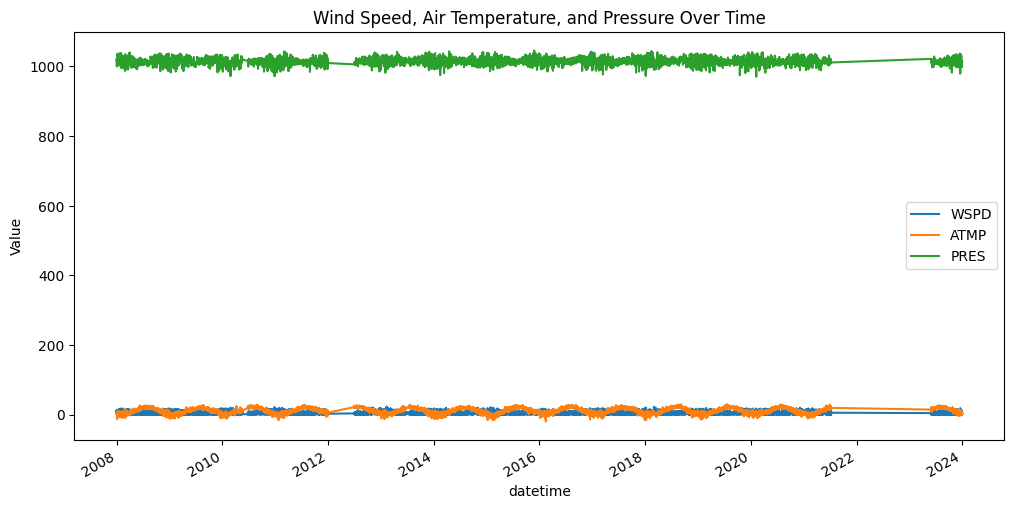

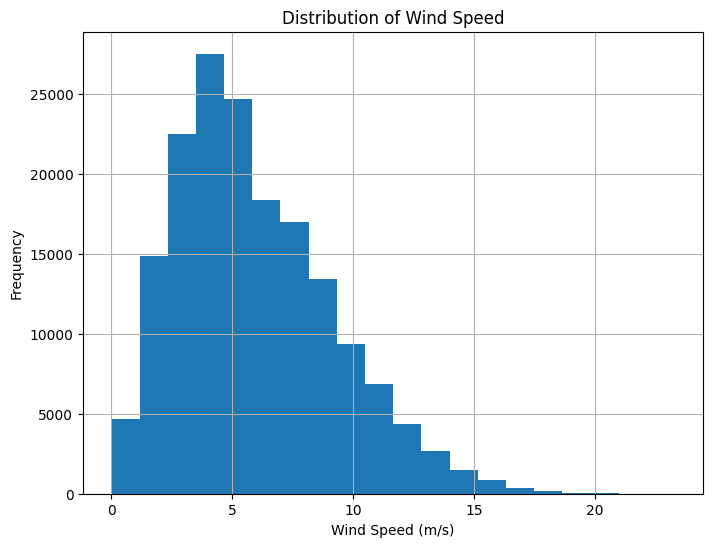

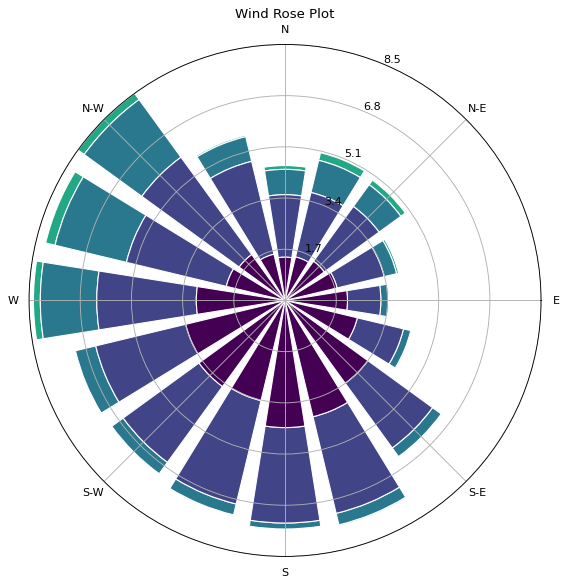

                WDIR           WSPD            GST           PRES  \
count  169220.000000  169220.000000  169220.000000  169220.000000   
mean      197.060856       5.920633       7.331340    1015.415388   
std        97.638685       3.245112       4.037064       8.634617   
min         0.000000       0.000000       0.000000     970.000000   
25%       128.000000       3.500000       4.300000    1010.100000   
50%       205.000000       5.300000       6.500000    1015.200000   
75%       280.000000       7.900000       9.800000    1021.100000   
max       360.000000      23.300000      29.200000    1045.500000   

                ATMP  
count  169220.000000  
mean       10.407566  
std         7.732769  
min       -19.500000  
25%         4.400000  
50%        10.300000  
75%        17.300000  
max        30.100000  
analysing station iosn3


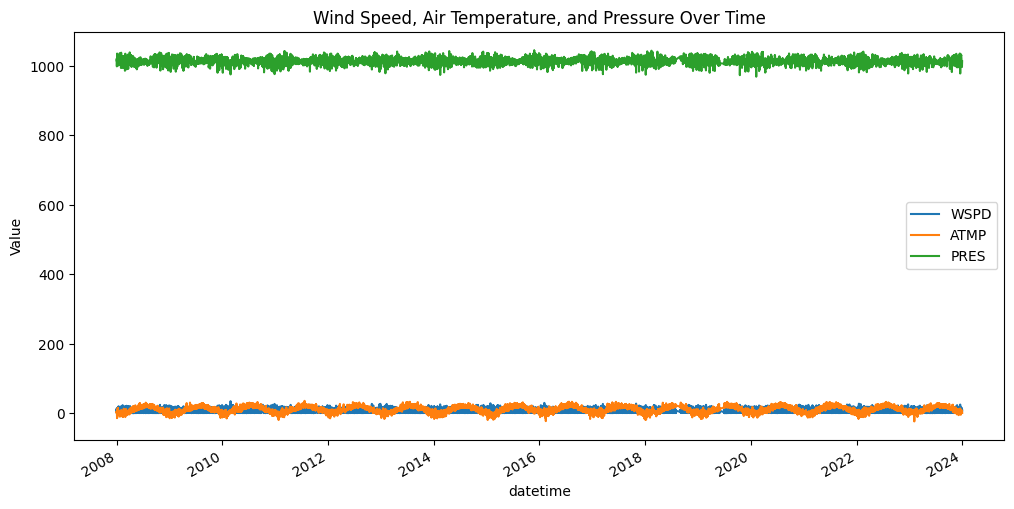

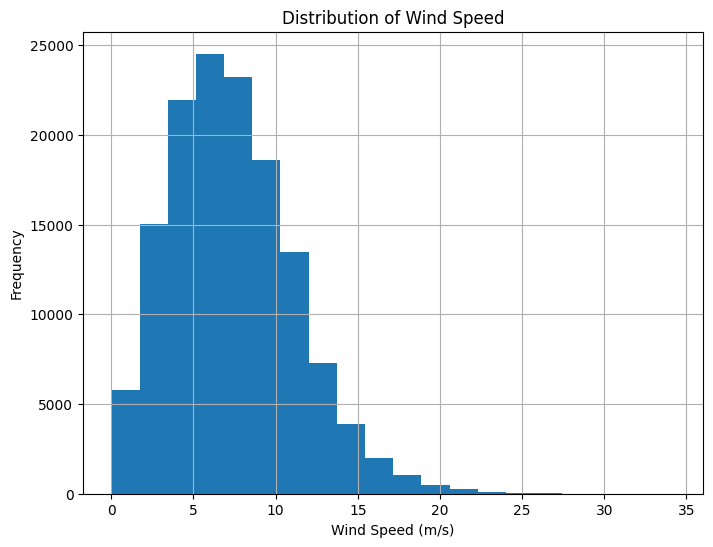

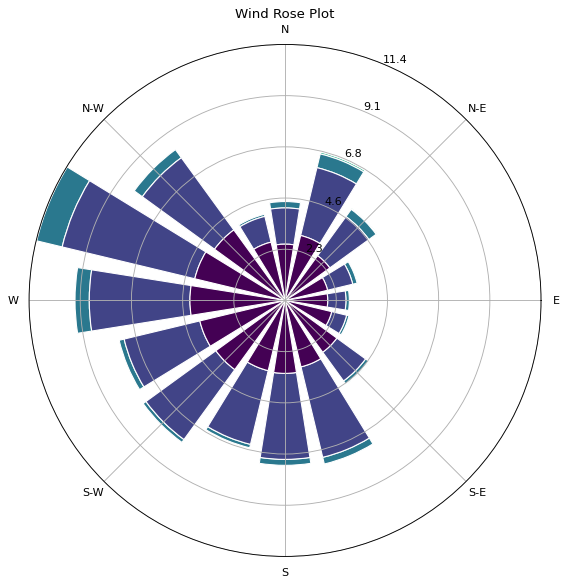

                WDIR           WSPD            GST           PRES  \
count  137826.000000  137826.000000  137826.000000  137826.000000   
mean      195.619571       7.354583       8.117143    1015.295679   
std        99.280685       3.778384       4.249284       8.724988   
min         0.000000       0.000000       0.000000     969.400000   
25%       129.000000       4.600000       5.000000    1010.000000   
50%       212.000000       7.000000       7.600000    1015.400000   
75%       281.000000       9.700000      10.700000    1021.000000   
max       360.000000      34.300000      40.400000    1044.800000   

                ATMP  
count  137826.000000  
mean        9.681614  
std         8.671996  
min       -24.000000  
25%         3.200000  
50%         9.800000  
75%        17.000000  
max        35.300000  


In [11]:

for ind, station_dataframe in enumerate(station_dataframes):
    print(f"analysing station {station_numbers[ind]}")
    plot_time_series(station_dataframe)
    plot_histograms(station_dataframe)
    plot_windrose(station_dataframe)
    statistics_data = station_dataframe.describe()
    print(statistics_data)

